In [3]:
type(type(type("lol")))

type

In [19]:
from sympy import lambdify, Matrix
from sympy.abc import x, c
import numpy
array2mat = [{'ImmutableDenseMatrix': numpy.matrix}, 'numpy']
f = lambdify((x, u), [u, -x])
X = [1,2]
f(*X)

SyntaxError: can't use starred expression here (Temp/ipykernel_7188/3561761331.py, line 7)

In [16]:
import numpy as np
def dX_dt(t, X):
    X_dot = np.array([X[1], -X[0]])
    return X_dot
dX_dt(0,X)

array([ 2, -1])

In [3]:
x=[0,1,2,3,4]
for i in range(1,len(x)):
    print(x[i])

1
2
3
4


In [35]:
def fsolvenotshit(f,numsolutions,domain,params=None,checks=10):
    
    #domain has 2 values for each dimension of fs input
    ranges=[]
    for i in domain:
        ranges.append(np.linspace(i[0],i[1],checks))
    #list of lists of input vals
    solutions = []
    #print(params)
    for i in ranges:
        for j in i:
            #print(j)
            sol=fsolve(f,j)
            if sol[0] not in solutions:
                solutions.append(sol[0])
            if len(solutions)==numsolutions:
                
                return [i for i in solutions if i]
    print("did not find intended number of solutions")
    return [i for i in solutions if i]


In [30]:
import sympy as sp

In [36]:
f = lambdify(x, sp.sin(x))
k=fsolvenotshit(f,16,[[-10,10]])
print(k)


-9.42477796076938
18.849555921538744
-6.283185307179586
-3.141592653589793
0.0
3.141592653589793
6.283185307179586
-18.849555921538744
9.42477796076938
did not find intended number of solutions
[-9.42477796076938, 18.849555921538744, -6.283185307179586, -3.141592653589793, 3.141592653589793, 6.283185307179586, -18.849555921538744, 9.42477796076938]


C:\Users\kiera\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\kiera\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


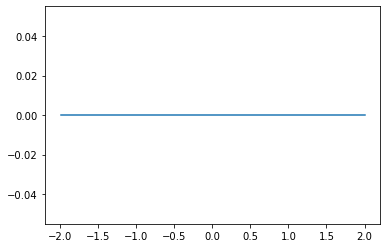

In [20]:
from sympy import lambdify, Matrix
from sympy.abc import x, c
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
n=1000#number of parameter values
xvals=np.linspace(-1,1,1000)
cvals = np.linspace(-2,2,n)
sol=np.zeros(n+1)
k=1
for i in cvals:
    f = lambdify(x, x**3-x+i)
    sol[k]=fsolvenotshit(f,10,[[-10,10]])
    #plt.plot(f(xvals))
    
plt.plot(cvals,sol[0:-1])


In [12]:
import numpy as np
mx=6
d = np.diag([1]*(mx-1))
d1 = np.diag([2]*(mx-2),k=1)
d2 = np.diag([3]*(mx-2),k=-1)
A=d+d1+d2
A

array([[1, 2, 0, 0, 0],
       [3, 1, 2, 0, 0],
       [0, 3, 1, 2, 0],
       [0, 0, 3, 1, 2],
       [0, 0, 0, 3, 1]])

In [13]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [14]:
A = np.array([[10,2,0,0],[3,10,4,0],[0,1,7,5],[0,0,3,4]],dtype=float)   

a = np.array([3.,1,3]) 
b = np.array([10.,10.,7.,4.])
c = np.array([2.,4.,5.])
d = np.array([3,4,5,6.])

print (TDMAsolver(a, b, c, d))

[ 0.14877589  0.75612053 -1.00188324  2.25141243]


In [15]:
print(A)

[[10.  2.  0.  0.]
 [ 3. 10.  4.  0.]
 [ 0.  1.  7.  5.]
 [ 0.  0.  3.  4.]]


C:\Users\kiera\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


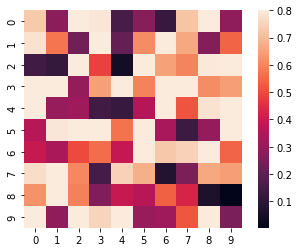

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()
data = np.random.rand(10, 10)
sns.heatmap(data, vmax=.8, square=True)

def init():
      sns.heatmap(np.zeros((10, 10)), vmax=.8, square=True, cbar=False)

def animate(i,data=[]):

    sns.heatmap(data[i], vmax=.8, square=True, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)


In [6]:
np.zeros((10, 10)).flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
L=5
xvals = np.linspace(0,L,11)
print(xvals.shape)
xvals=np.meshgrid(xvals,xvals)
xvals=np.array(xvals).T
a=[]
for i in xvals:
    print(i)
  
        


(11,)
[[0.  0. ]
 [0.  0.5]
 [0.  1. ]
 [0.  1.5]
 [0.  2. ]
 [0.  2.5]
 [0.  3. ]
 [0.  3.5]
 [0.  4. ]
 [0.  4.5]
 [0.  5. ]]
[[0.5 0. ]
 [0.5 0.5]
 [0.5 1. ]
 [0.5 1.5]
 [0.5 2. ]
 [0.5 2.5]
 [0.5 3. ]
 [0.5 3.5]
 [0.5 4. ]
 [0.5 4.5]
 [0.5 5. ]]
[[1.  0. ]
 [1.  0.5]
 [1.  1. ]
 [1.  1.5]
 [1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [1.  4. ]
 [1.  4.5]
 [1.  5. ]]
[[1.5 0. ]
 [1.5 0.5]
 [1.5 1. ]
 [1.5 1.5]
 [1.5 2. ]
 [1.5 2.5]
 [1.5 3. ]
 [1.5 3.5]
 [1.5 4. ]
 [1.5 4.5]
 [1.5 5. ]]
[[2.  0. ]
 [2.  0.5]
 [2.  1. ]
 [2.  1.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]
 [2.  4. ]
 [2.  4.5]
 [2.  5. ]]
[[2.5 0. ]
 [2.5 0.5]
 [2.5 1. ]
 [2.5 1.5]
 [2.5 2. ]
 [2.5 2.5]
 [2.5 3. ]
 [2.5 3.5]
 [2.5 4. ]
 [2.5 4.5]
 [2.5 5. ]]
[[3.  0. ]
 [3.  0.5]
 [3.  1. ]
 [3.  1.5]
 [3.  2. ]
 [3.  2.5]
 [3.  3. ]
 [3.  3.5]
 [3.  4. ]
 [3.  4.5]
 [3.  5. ]]
[[3.5 0. ]
 [3.5 0.5]
 [3.5 1. ]
 [3.5 1.5]
 [3.5 2. ]
 [3.5 2.5]
 [3.5 3. ]
 [3.5 3.5]
 [3.5 4. ]
 [3.5 4.5]
 [3.5 5. ]]
[[4.  0. ]
 [4.  0

In [1]:
L=1
def u_I2d(x):
    pi=np.pi
    # initial temperature distribution
    print("in func")
    print(x)
    print(np.array([np.sin(pi*x[0]/L),np.sin(pi*x[1]/L)]))
    return np.array([np.sin(pi*x[0]/L),np.sin(pi*x[1]/L)])

In [ ]:
def applyinnitial(X,f,shape):
    if X.shape != shape:
        applyinnitial(X[i],f,shape)
        

In [1]:
import matplotlib.pyplot as plt
import numpy as np
L=2
def u_I(x):
    # initial temperature distribution
    y = np.sin(np.pi*x/L)
    return y

In [2]:
xvals = np.linspace(-5,5,100)
u_I(xvals)

array([-1.        , -0.98743889, -0.95007112, -0.88883545, -0.80527026,
       -0.70147489, -0.58005691, -0.44406661, -0.29692038, -0.14231484,
        0.01586596,  0.17364818,  0.32706796,  0.47227107,  0.60560969,
        0.72373404,  0.82367658,  0.90292654,  0.95949297,  0.99195481,
        0.99949654,  0.9819287 ,  0.93969262,  0.87384938,  0.78605309,
        0.67850941,  0.55392006,  0.41541501,  0.26647381,  0.1108382 ,
       -0.04758192, -0.20480667, -0.35688622, -0.5       , -0.63055267,
       -0.74526445, -0.84125353, -0.91610846, -0.9679487 , -0.99547192,
       -0.99798668, -0.97542979, -0.92836793, -0.85798341, -0.76604444,
       -0.65486073, -0.52722547, -0.38634513, -0.23575894, -0.07924996,
        0.07924996,  0.23575894,  0.38634513,  0.52722547,  0.65486073,
        0.76604444,  0.85798341,  0.92836793,  0.97542979,  0.99798668,
        0.99547192,  0.9679487 ,  0.91610846,  0.84125353,  0.74526445,
        0.63055267,  0.5       ,  0.35688622,  0.20480667,  0.04

In [34]:
L=2
def u_I2d(x):
    # initial temperature distribution
    
    return np.array([np.sin(np.pi*x[0]/L),np.cos(np.pi*x[1]/L)])
 

In [37]:
A=np.meshgrid(xvals, xvals)
A

[array([[-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ],
        [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ],
        [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ],
        ...,
        [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ],
        [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ],
        [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
          5.       ]]),
 array([[-5.       , -5.       , -5.       , ..., -5.       , -5.       ,
         -5.       ],
        [-4.8989899, -4.8989899, -4.8989899, ..., -4.8989899, -4.8989899,
         -4.8989899],
        [-4.7979798, -4.7979798, -4.7979798, ..., -4.7979798, -4.7979798,
         -4.7979798],
        ...,
        [ 4.7979798,  4.7979798,  4.7979798, ...,  4.7979798,  4.7979798,
          4.7979798],
        [ 4.

In [39]:
def create2dgrid(min,max,steps):
    A=[]
    max=5
    x=y=min=0
    steps = 10
    stepsize=(max-x)/steps
    for j in range(steps):
        for i in range(steps):
            x+=stepsize
            A.append((x,y))
        x=min
        y+=stepsize
    return A


In [25]:
u_I2d(A)

[(0.5, 0), (1.0, 0), (1.5, 0), (2.0, 0), (2.5, 0), (3.0, 0), (3.5, 0), (4.0, 0), (4.5, 0), (5.0, 0), (0.5, 0.5), (1.0, 0.5), (1.5, 0.5), (2.0, 0.5), (2.5, 0.5), (3.0, 0.5), (3.5, 0.5), (4.0, 0.5), (4.5, 0.5), (5.0, 0.5), (0.5, 1.0), (1.0, 1.0), (1.5, 1.0), (2.0, 1.0), (2.5, 1.0), (3.0, 1.0), (3.5, 1.0), (4.0, 1.0), (4.5, 1.0), (5.0, 1.0), (0.5, 1.5), (1.0, 1.5), (1.5, 1.5), (2.0, 1.5), (2.5, 1.5), (3.0, 1.5), (3.5, 1.5), (4.0, 1.5), (4.5, 1.5), (5.0, 1.5), (0.5, 2.0), (1.0, 2.0), (1.5, 2.0), (2.0, 2.0), (2.5, 2.0), (3.0, 2.0), (3.5, 2.0), (4.0, 2.0), (4.5, 2.0), (5.0, 2.0), (0.5, 2.5), (1.0, 2.5), (1.5, 2.5), (2.0, 2.5), (2.5, 2.5), (3.0, 2.5), (3.5, 2.5), (4.0, 2.5), (4.5, 2.5), (5.0, 2.5), (0.5, 3.0), (1.0, 3.0), (1.5, 3.0), (2.0, 3.0), (2.5, 3.0), (3.0, 3.0), (3.5, 3.0), (4.0, 3.0), (4.5, 3.0), (5.0, 3.0), (0.5, 3.5), (1.0, 3.5), (1.5, 3.5), (2.0, 3.5), (2.5, 3.5), (3.0, 3.5), (3.5, 3.5), (4.0, 3.5), (4.5, 3.5), (5.0, 3.5), (0.5, 4.0), (1.0, 4.0), (1.5, 4.0), (2.0, 4.0), (2.5, 4.0),

TypeError: can't multiply sequence by non-int of type 'float'

In [33]:
I=[]
for i in A:
    I.append(u_I2d(i))
I

(0.5, 0)
(1.0, 0)
(1.5, 0)
(2.0, 0)
(2.5, 0)
(3.0, 0)
(3.5, 0)
(4.0, 0)
(4.5, 0)
(5.0, 0)
(0.5, 0.5)
(1.0, 0.5)
(1.5, 0.5)
(2.0, 0.5)
(2.5, 0.5)
(3.0, 0.5)
(3.5, 0.5)
(4.0, 0.5)
(4.5, 0.5)
(5.0, 0.5)
(0.5, 1.0)
(1.0, 1.0)
(1.5, 1.0)
(2.0, 1.0)
(2.5, 1.0)
(3.0, 1.0)
(3.5, 1.0)
(4.0, 1.0)
(4.5, 1.0)
(5.0, 1.0)
(0.5, 1.5)
(1.0, 1.5)
(1.5, 1.5)
(2.0, 1.5)
(2.5, 1.5)
(3.0, 1.5)
(3.5, 1.5)
(4.0, 1.5)
(4.5, 1.5)
(5.0, 1.5)
(0.5, 2.0)
(1.0, 2.0)
(1.5, 2.0)
(2.0, 2.0)
(2.5, 2.0)
(3.0, 2.0)
(3.5, 2.0)
(4.0, 2.0)
(4.5, 2.0)
(5.0, 2.0)
(0.5, 2.5)
(1.0, 2.5)
(1.5, 2.5)
(2.0, 2.5)
(2.5, 2.5)
(3.0, 2.5)
(3.5, 2.5)
(4.0, 2.5)
(4.5, 2.5)
(5.0, 2.5)
(0.5, 3.0)
(1.0, 3.0)
(1.5, 3.0)
(2.0, 3.0)
(2.5, 3.0)
(3.0, 3.0)
(3.5, 3.0)
(4.0, 3.0)
(4.5, 3.0)
(5.0, 3.0)
(0.5, 3.5)
(1.0, 3.5)
(1.5, 3.5)
(2.0, 3.5)
(2.5, 3.5)
(3.0, 3.5)
(3.5, 3.5)
(4.0, 3.5)
(4.5, 3.5)
(5.0, 3.5)
(0.5, 4.0)
(1.0, 4.0)
(1.5, 4.0)
(2.0, 4.0)
(2.5, 4.0)
(3.0, 4.0)
(3.5, 4.0)
(4.0, 4.0)
(4.5, 4.0)
(5.0, 4.0)
(0.5, 4.5)
(1.0, 4.5)
(1.5, 4.

[array([0.70710678, 1.        ]),
 array([1., 1.]),
 array([0.70710678, 1.        ]),
 array([1.2246468e-16, 1.0000000e+00]),
 array([-0.70710678,  1.        ]),
 array([-1.,  1.]),
 array([-0.70710678,  1.        ]),
 array([-2.4492936e-16,  1.0000000e+00]),
 array([0.70710678, 1.        ]),
 array([1., 1.]),
 array([0.70710678, 0.70710678]),
 array([1.        , 0.70710678]),
 array([0.70710678, 0.70710678]),
 array([1.22464680e-16, 7.07106781e-01]),
 array([-0.70710678,  0.70710678]),
 array([-1.        ,  0.70710678]),
 array([-0.70710678,  0.70710678]),
 array([-2.44929360e-16,  7.07106781e-01]),
 array([0.70710678, 0.70710678]),
 array([1.        , 0.70710678]),
 array([7.07106781e-01, 6.12323400e-17]),
 array([1.000000e+00, 6.123234e-17]),
 array([7.07106781e-01, 6.12323400e-17]),
 array([1.2246468e-16, 6.1232340e-17]),
 array([-7.07106781e-01,  6.12323400e-17]),
 array([-1.000000e+00,  6.123234e-17]),
 array([-7.07106781e-01,  6.12323400e-17]),
 array([-2.4492936e-16,  6.1232340

In [44]:
X=create2dgrid(0,1,5)
boundary = lambda  t : (np.zeros(shape=np.shape(X[0])),np.zeros(shape=np.shape(X[0])))
boundary(0)[0]

array([0., 0.])

In [77]:
mx=10
lmbda=1
d = np.array([2*lmbda+1]*(mx))
d1 = np.array([-lmbda]*(mx-1))
d2 = np.array([-lmbda]*(mx-1))
A=np.diag(d)+np.diag(d1,k=1)+np.diag(d2,k=-1)
A.T

array([[ 3, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  3, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  3, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  3, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  3, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  3, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  3, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  3, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [51]:
np.linspace(0,1,2)

array([0., 1.])

In [52]:
for j in range(0):
    print(j)

In [58]:
lmbda=1
mx=4
d = np.array([2*lmbda+1]*(mx))
d1 = np.array([-lmbda]*(mx-1))
d2 = np.array([-lmbda]*(mx-1))
A=np.diag(d)+np.diag(d1,k=1)+np.diag(d2,k=-1)
A

array([[ 3, -1,  0,  0],
       [-1,  3, -1,  0],
       [ 0, -1,  3, -1],
       [ 0,  0, -1,  3]])

In [97]:
A = np.zeros(shape=(3,3,3))
np.fill_diagonal(A, 5)

print(np.flip(A,axis=2))
A

[[[0. 0. 5.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 5. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [5. 0. 0.]]]


array([[[5., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 5., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 5.]]])

In [1]:
import numpy as np
from scipy.linalg import block_diag

# Define input matrices

a = np.ones((3, 3))
b = np.ones((3, 3))
c = np.ones((3, 3))

# Generate block diagonal matrices

mats = np.array([a, b, c]).reshape(3, 3,3)
print(mats)
result = [block_diag(*bmats) for bmats in mats]
result=np.flip(np.array(result),axis=2)+result
result

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


array([[[1., 1., 1., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 2., 2., 2., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 1., 1.]],

       [[1., 1., 1., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 2., 2., 2., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 1., 1.]],

       [[1., 1., 1., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 2., 2., 2., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 1., 1., 1.]]])

In [90]:
np.shape(result)

(3, 3, 9)

In [65]:
mx=3
lmbda=1
d = np.array([2*lmbda+1]*(mx))
d1 = np.array([-lmbda]*(mx-1))
d2 = np.array([-lmbda]*(mx-1))
A=np.zeros((3,3,3))
np.fill_diagonal(A, d)


print(A)
A[0]

[[[3. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 3. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 3.]]]


array([[3., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [150]:
from sympy.abc import a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v
mx=3
vals = np.linspace(0,mx,mx)
coords = []
letters = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v]
letters=[]
for i in range(1000):
    letters.append(sp.symbols("A"+str(i)))
count=0
dic = dict()
for i in vals:
    row=[]
    for j in vals:
        row.append(letters[count])
        dic[letters[count]]=(i,j)
        count+=1

    coords.append(row)

#res=np.matmul(coords,A)
#res

coords=np.array(coords)
#np.matmul(A,coords)
#np.dot(A,coords)
coords

array([[A0, A1, A2],
       [A3, A4, A5],
       [A6, A7, A8]], dtype=object)

In [151]:
letters=[]
for i in range(1000):
    letters.append(sp.symbols("B"+str(i)))
A=np.reshape(letters[:mx**3],(mx,mx,mx))
A

array([[[B0, B1, B2],
        [B3, B4, B5],
        [B6, B7, B8]],

       [[B9, B10, B11],
        [B12, B13, B14],
        [B15, B16, B17]],

       [[B18, B19, B20],
        [B21, B22, B23],
        [B24, B25, B26]]], dtype=object)

In [162]:
dot=np.matmul(coords,A)
res=dot[0]
for i in range(1,len(dot)):
    res+=dot[i]
coordsT=coords.T 
dotT=np.matmul(coordsT,A)
for i in range(0,len(dotT)):
    res+=dotT[i]
print(np.shape(res))
res


(3, 3)


array([[2*A0*B0 + 2*A0*B18 + 2*A0*B9 + A1*B12 + A1*B21 + A1*B3 + A2*B15 + A2*B24 + A2*B6 + A3*B12 + A3*B21 + A3*B3 + A6*B15 + A6*B24 + A6*B6,
        2*A0*B1 + 2*A0*B10 + 2*A0*B19 + A1*B13 + A1*B22 + A1*B4 + A2*B16 + A2*B25 + A2*B7 + A3*B13 + A3*B22 + A3*B4 + A6*B16 + A6*B25 + A6*B7,
        2*A0*B11 + 2*A0*B2 + 2*A0*B20 + A1*B14 + A1*B23 + A1*B5 + A2*B17 + A2*B26 + A2*B8 + A3*B14 + A3*B23 + A3*B5 + A6*B17 + A6*B26 + A6*B8],
       [A1*B0 + A1*B18 + A1*B9 + A3*B0 + A3*B18 + A3*B9 + 2*A4*B12 + 2*A4*B21 + 2*A4*B3 + A5*B15 + A5*B24 + A5*B6 + A7*B15 + A7*B24 + A7*B6,
        A1*B1 + A1*B10 + A1*B19 + A3*B1 + A3*B10 + A3*B19 + 2*A4*B13 + 2*A4*B22 + 2*A4*B4 + A5*B16 + A5*B25 + A5*B7 + A7*B16 + A7*B25 + A7*B7,
        A1*B11 + A1*B2 + A1*B20 + A3*B11 + A3*B2 + A3*B20 + 2*A4*B14 + 2*A4*B23 + 2*A4*B5 + A5*B17 + A5*B26 + A5*B8 + A7*B17 + A7*B26 + A7*B8],
       [A2*B0 + A2*B18 + A2*B9 + A5*B12 + A5*B21 + A5*B3 + A6*B0 + A6*B18 + A6*B9 + A7*B12 + A7*B21 + A7*B3 + 2*A8*B15 + 2*A8*B24 + 2*A8*B6,
  

In [167]:
res[0,0]

2*A0*B0 + 2*A0*B18 + 2*A0*B9 + A1*B12 + A1*B21 + A1*B3 + A2*B15 + A2*B24 + A2*B6 + A3*B12 + A3*B21 + A3*B3 + A6*B15 + A6*B24 + A6*B6

In [166]:
coords[2,1]

A7

In [164]:
coords

array([[A0, A1, A2],
       [A3, A4, A5],
       [A6, A7, A8]], dtype=object)

In [147]:
np.matmul(coords,A[0])

array([[a*e + b*g, a*f + b*h],
       [c*e + d*g, c*f + d*h]], dtype=object)

In [136]:
import sympy as sp
mx=4
lmbda=1
X= sp.symbols("x")
d = np.array([-2*lmbda+1]*(mx))
d1 = np.array([lmbda]*(mx-1))
d2 = np.array([lmbda]*(mx-1))
A=np.zeros((mx,mx,mx))
np.fill_diagonal(A, d)


for a in range(mx-1):
    A[a-1,a,a]+=-lmbda
for a in range(mx-1):
    A[a+1,a,a]+=-lmbda
for a in range(mx-1):
    A[a,a-1,a]+=-lmbda
for a in range(mx-1):
    A[a,a+1,a]+=-lmbda
   
"""for a in range(mx-1):
    A[a,a,a-1]+=-lmbda
for a in range(mx-1):
    A[a,a,a+1]+=-lmbda"""
print(A)
dot=np.dot(A,coords)
print(dot)
res=dot[0]
for i in range(1,len(dot)):
    res+=dot[i] 
dot=np.dot(A,coords.T)
res+=dot[0]
for i in range(1,len(dot)):
    res+=dot[i] 
res[1,2]

[[[-1.  0.  0.  0.]
  [-1. -1.  0.  0.]
  [ 0.  0.  0.  0.]
  [-1.  0.  0.  0.]]

 [[-1. -1.  0.  0.]
  [ 0. -1.  0.  0.]
  [ 0. -1. -1.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0. -1. -1.  0.]
  [ 0.  0. -1.  0.]
  [ 0.  0. -1.  0.]]

 [[-1.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0. -1.  0.]
  [ 0.  0.  0. -1.]]]
[[[-1.0*a -1.0*b -1.0*c -1.0*d]
  [-1.0*a - 1.0*e -1.0*b - 1.0*f -1.0*c - 1.0*g -1.0*d - 1.0*h]
  [0 0 0 0]
  [-1.0*a -1.0*b -1.0*c -1.0*d]]

 [[-1.0*a - 1.0*e -1.0*b - 1.0*f -1.0*c - 1.0*g -1.0*d - 1.0*h]
  [-1.0*e -1.0*f -1.0*g -1.0*h]
  [-1.0*e - 1.0*i -1.0*f - 1.0*j -1.0*g - 1.0*k -1.0*h - 1.0*l]
  [0 0 0 0]]

 [[0 0 0 0]
  [-1.0*e - 1.0*i -1.0*f - 1.0*j -1.0*g - 1.0*k -1.0*h - 1.0*l]
  [-1.0*i -1.0*j -1.0*k -1.0*l]
  [-1.0*i -1.0*j -1.0*k -1.0*l]]

 [[-1.0*a -1.0*b -1.0*c -1.0*d]
  [0 0 0 0]
  [-1.0*i -1.0*j -1.0*k -1.0*l]
  [-1.0*m -1.0*n -1.0*o -1.0*p]]]


-1.0*c - 3.0*g - 1.0*i - 3.0*j - 2.0*k

In [34]:
np.shape(A)

(3, 3, 3)

In [86]:
coords

array([[a, b, c, d],
       [e, f, g, h],
       [i, j, k, l],
       [m, n, o, p]], dtype=object)

In [87]:
A

array([[[ 3., -1.,  0., -1.],
        [-1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  0.]],

       [[-1., -1.,  0.,  0.],
        [-1.,  3., -1.,  0.],
        [ 0., -1., -1.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0., -1., -1.,  0.],
        [ 0., -1.,  3., -1.],
        [ 0.,  0., -1.,  0.]],

       [[-1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  3.]]])

In [56]:
np.tensordot(coords,A)

array([3.0*a - 1.0*b - 1.0*c - 1.0*d - 1.0*g,
       -1.0*b - 1.0*d + 3.0*e - 1.0*f - 1.0*h, 3.0*i], dtype=object)

In [99]:
dot=np.dot(A,coords)

res=dot[0]
for i in range(1,len(dot)):
    res+=dot[i] 

res[1,1]

array([[-5.0*a - 1.0*e - 1.0*i, -5.0*b - 1.0*f - 1.0*j,
        -5.0*c - 1.0*g - 1.0*k, -5.0*d - 1.0*h - 1.0*l],
       [-1.0*a - 5.0*e - 1.0*i - 2.0*m, -1.0*b - 5.0*f - 1.0*j - 2.0*n,
        -1.0*c - 5.0*g - 1.0*k - 2.0*o, -1.0*d - 5.0*h - 1.0*l - 2.0*p],
       [-1.0*a - 1.0*e - 5.0*i, -1.0*b - 1.0*f - 5.0*j,
        -1.0*c - 1.0*g - 5.0*k, -1.0*d - 1.0*h - 5.0*l],
       [-1.0*a - 2.0*e - 1.0*i - 3.0*m, -1.0*b - 2.0*f - 1.0*j - 3.0*n,
        -1.0*c - 2.0*g - 1.0*k - 3.0*o, -1.0*d - 2.0*h - 1.0*l - 3.0*p]],
      dtype=object)

In [89]:
coords[1,1]

f

In [90]:
coords

array([[a, b, c, d],
       [e, f, g, h],
       [i, j, k, l],
       [m, n, o, p]], dtype=object)

In [100]:
res[1,1]

-1.0*b - 5.0*f - 1.0*j - 2.0*n

In [61]:
dot=np.matmul(A,coords)
res=dot[0]
for i in range(1,len(dot)):
    res+=dot[i] 
res

array([[1.0*a - 1.0*d, 1.0*b - 1.0*e, 1.0*c - 1.0*f],
       [-1.0*a + 1.0*d, -1.0*b + 1.0*e, -1.0*c + 1.0*f],
       [-1.0*a - 1.0*d + 3.0*g, -1.0*b - 1.0*e + 3.0*h,
        -1.0*c - 1.0*f + 3.0*i]], dtype=object)

In [5]:
import numpy as np
def create2dgrid(min,max,steps):
    if steps==0:
        return np.array([(min,min),(max,max)])
    A=[]
    x=y=min
    stepsize=(max-x)/(steps-1)
    for j in range(steps):
        row=[]
        for i in range(steps):
            row.append((x,y))
            x+=stepsize
        x=min
        y+=stepsize
        A.append(row)
    return np.array(A)


In [7]:
A=create2dgrid(0,1,4)
A.shape
A


array([[[0.        , 0.        ],
        [0.33333333, 0.        ],
        [0.66666667, 0.        ],
        [1.        , 0.        ]],

       [[0.        , 0.33333333],
        [0.33333333, 0.33333333],
        [0.66666667, 0.33333333],
        [1.        , 0.33333333]],

       [[0.        , 0.66666667],
        [0.33333333, 0.66666667],
        [0.66666667, 0.66666667],
        [1.        , 0.66666667]],

       [[0.        , 1.        ],
        [0.33333333, 1.        ],
        [0.66666667, 1.        ],
        [1.        , 1.        ]]])

In [34]:
A.flatten().reshape(np.prod(A.shape[:-1]),A.shape[-1])

array([[0.        , 0.        ],
       [0.33333333, 0.        ],
       [0.66666667, 0.        ],
       [1.        , 0.        ],
       [0.        , 0.33333333],
       [0.33333333, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.33333333],
       [0.        , 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.66666667],
       [1.        , 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 1.        ],
       [0.66666667, 1.        ],
       [1.        , 1.        ]])

In [82]:
sol = np.zeros(shape=((A.shape[:-1])))
sol

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [194]:
np.prod([2,2,2,3])

24

In [198]:
np.array([2,2,2,3]).flatten()==np.array([2,2,2,3])

array([ True,  True,  True,  True])

In [212]:
M=np.ones((3,3))
v=np.array([1,1,1])

np.matmul(M,v)

array([3., 3., 3.])

In [213]:
np.shape(v)

(3,)

In [215]:
np.shape(1)

()

In [45]:
def boundaryfunc(X,t):
    n=X[0]+X[1]
    return 1
    

In [113]:
def applycond (t,sol,boundary,X,boundaryonly):
    #applies a function of x and t to either edges of sol, or entire
    dims= np.shape(X)[-1]
    sidelength = int(len(sol)**(1/dims))
    sol=sol.flatten()
    #2boundaries per dim
    """
    X and sol should both be flat and have same num of elements, where each element of X is tuple
    assuming square domain, n=sidelength= int(len(sol)**1/2), first and last n values boundary, 
    as well as every nth value, if cube domain every n*n value also edge
    """
    if boundaryonly:
        for d in range(dims):
            for i in range(sidelength):
                sol[i*(sidelength)**d]+=boundary(X[i*(sidelength)**d],t)
                sol[(-i*(sidelength)**d)-1]+=boundary(X[(-i*(sidelength)**d)-1],t)
    else:
        for i in range(len(sol)):
            sol[i]+=boundary(X[i],t)
    return sol

In [38]:
A=A.flatten().reshape(np.prod(A.shape[:-1]),A.shape[-1])

In [116]:
sol = np.zeros(shape=((A.shape[:-1])))
sol=sol.flatten()
applied=applycond(1,sol,boundaryfunc,A,True)

In [117]:
applied = applied.reshape((4,4))
applied

array([[2., 1., 1., 2.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [2., 1., 1., 2.]])

In [96]:
applied = sol
for i in range(4):
    applied[i]+=1
    applied[-i-1]+=1


In [103]:
applied = sol = np.zeros(shape=((A.shape[:-1]))).flatten()
print(applied)
for d in range(2):
    for i in range(4):
        applied[i*(4)**d]+=1
        applied[(-i*(4)**d)-1]+=1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
